In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data=pd.read_csv("data.csv")
print(data.shape)
data.describe()

(6819, 96)


Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [ ]:
from sklearn.preprocessing import 

In [32]:
def data_dtypes(data,x):
    if x=="object":
        return data.select_dtypes(include=[x]).columns
    elif x=="int64":
        return data.select_dtypes(include=[x]).columns
    elif x=="float64":
        return data.select_dtypes(include=[x]).columns
    else:
        return "Wrong input"
print(f'{data_dtypes(data,"object")} are object type')
print(f'{data_dtypes(data,"int64")} are int type')
print(f'{data_dtypes(data,"float64")} are float type')

Index([], dtype='object') are object type
Index(['Bankrupt?', ' Liability-Assets Flag', ' Net Income Flag'], dtype='object') are int type
Index([' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
   

In [18]:
def data_type_transform(data):
    for i in data.columns:
        if data[i].dtype=="int64":
            data[i]=data[i].astype("int16")
        elif data[i].dtype=="float64":
            data[i]=data[i].astype("float16")
    return data
data=data_type_transform(data)

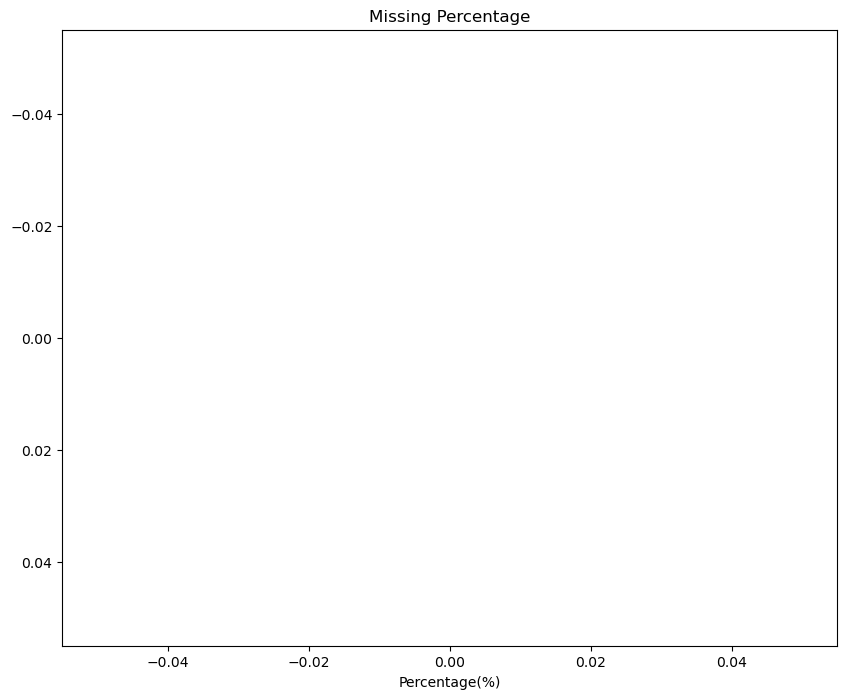

In [26]:
def Missing_Counts( Data ) : 
    missing = Data.isnull().sum()  # 計算欄位中缺漏值的數量 
    missing = missing[ missing>0 ]
    missing.sort_values( inplace=True,ascending=False) 
    Missing_Count = pd.DataFrame( { 'ColumnName':missing.index, 'MissingCount':missing.values } )  # Convert Series to DataFrame
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['MissingCount'].apply( lambda x:round(x/Data.shape[0]*100,2) )
    return  Missing_Count
#missing= Missing_Counts(dataset).sort_values('Percentage(%)',inplace=True,ascending=False) 
missing= Missing_Counts(data)
#print(missing)
plt.figure(figsize=(10,8))
try:
    plt.title('Missing Percentage')
except:
    pass
plt.xlabel('Percentage(%)')
plt.barh(missing['ColumnName'],width=missing['Percentage(%)'])
#反轉y軸
plt.gca().invert_yaxis()
plt.show()

In [35]:
part=len(data.columns)//3
data_up=data.iloc[:,:part]
data_middle=data.iloc[:,part:part*2]
data_down=data.iloc[:,part*2:]

In [37]:
data_up

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0             1                                           0.370594          
1             1                                           0.464291          
2             1                                           0.426071          
3             1                                           0.399844          
4             1                                           0.465022          
...         ...                                                ...          
6814          0                                           0.493687          
6815          0                                           0.475162          
6816          0                                           0.472725          
6817          0                                           0.506264          
6818          0                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3                                    0.451265   
4                                    0.538432   
...                                       ...   
6814                                 0.539468   
6815                                 0.538269   
6816                                 0.533744   
6817                                 0.559911   
6818                                 0.570105   

       ROA(B) before interest and depreciation after tax  \
0                                              0.405750    
1                                              0.516730    
2                                              0.472295    
3                                              0.457733    
4                                              0.522298    
...                                                 ...    
6814                                           0.543230    
6815                                           0.524172    
6816                                           0.520638    
6817                                           0.554045    
6818                                           0.549548    

       Operating Gross Margin   Realized Sales Gross Margin  \
0                    0.601457                      0.601457   
1                    0.610235                      0.610235   
2                    0.601450                      0.601364   
3                    0.583541                      0.583541   
4                    0.598783                      0.598783   
...                       ...                           ...   
6814                 0.604455                      0.604462   
6815                 0.598308                      0.598308   
6816                 0.610444                      0.610213   
6817                 0.607850                      0.607850   
6818                 0.627409                      0.627409   

       Operating Profit Rate   Pre-tax net Interest Rate  \
0                   0.998969                    0.796887   
1                   0.998946                    0.797380   
2                   0.998857                    0.796403   
3                   0.998700                    0.796967   
4                   0.998973                    0.797366   
...                      ...                         ...   
6814                0.998992                    0.797409   
6815                0.998992                    0.797414   
6816                0.998984                    0.797401   
6817                0.999074                    0.797500   
6818                0.998080                    0.801987   

       After-tax net Interest Rate  \
0                         0.808809   
1                         0.809301   
2                         0.808388   
3                         0.808966   
4                         0.809304   
...                            ...   
6814                      0

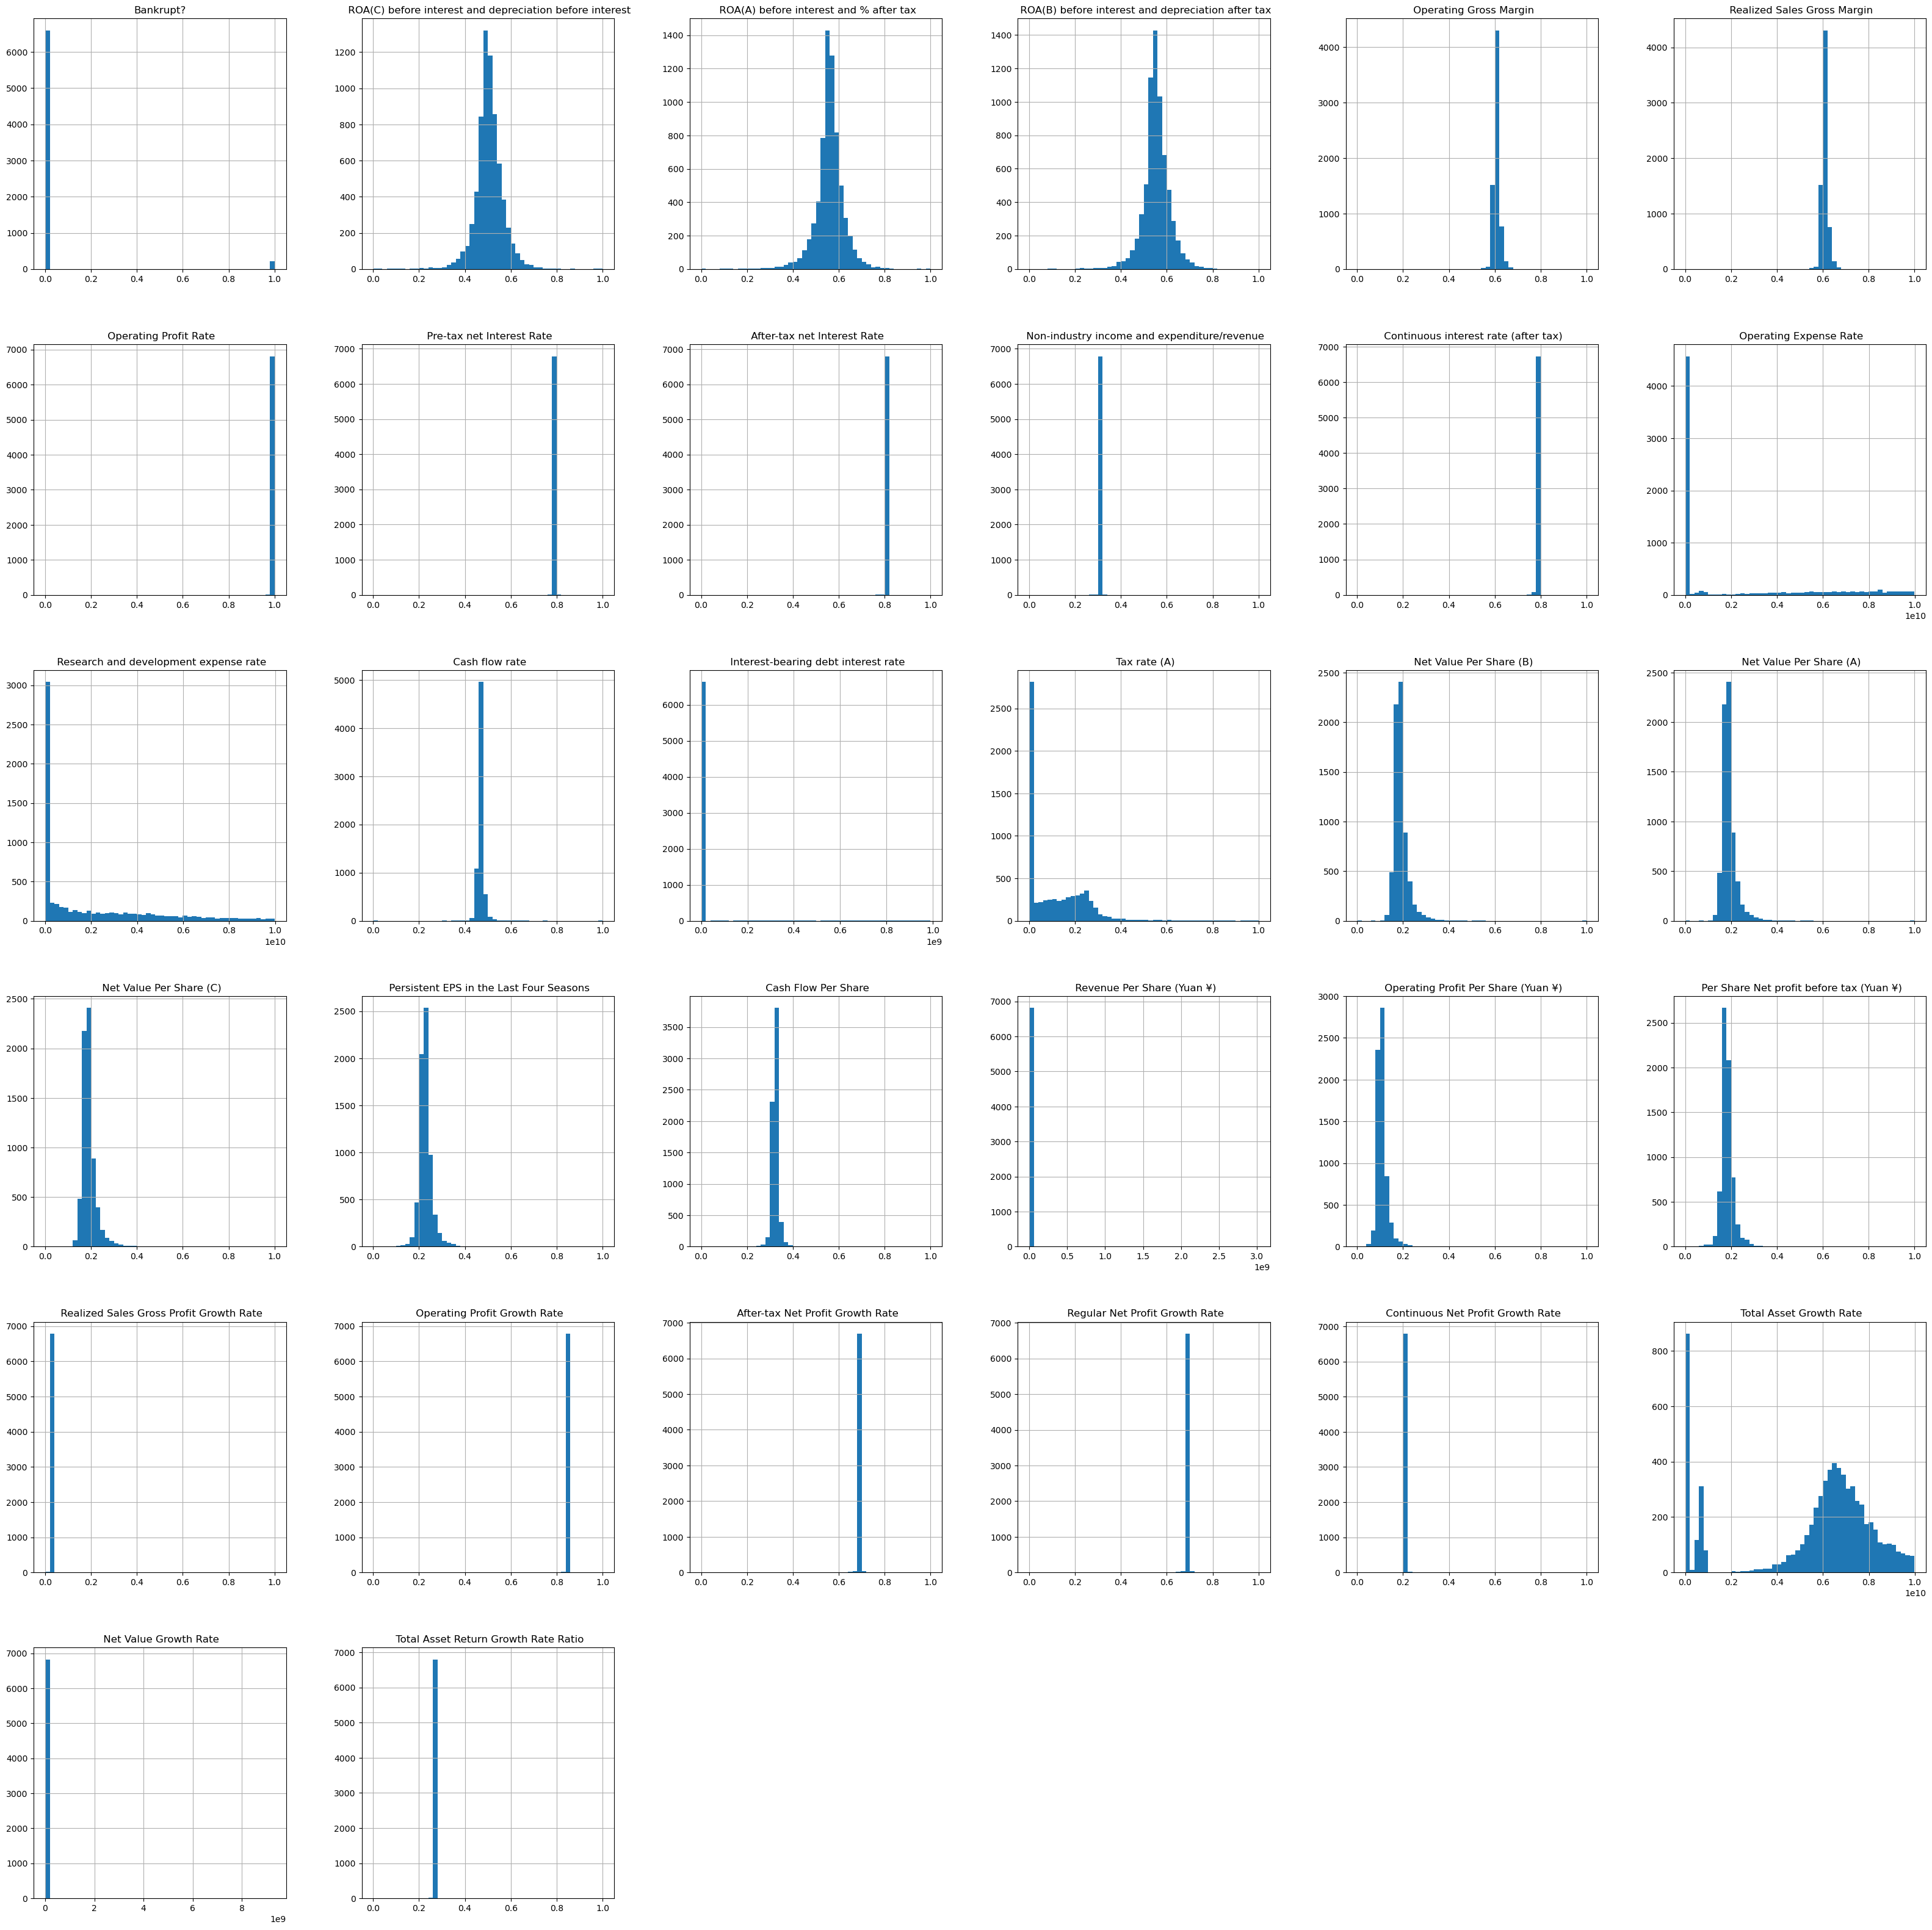

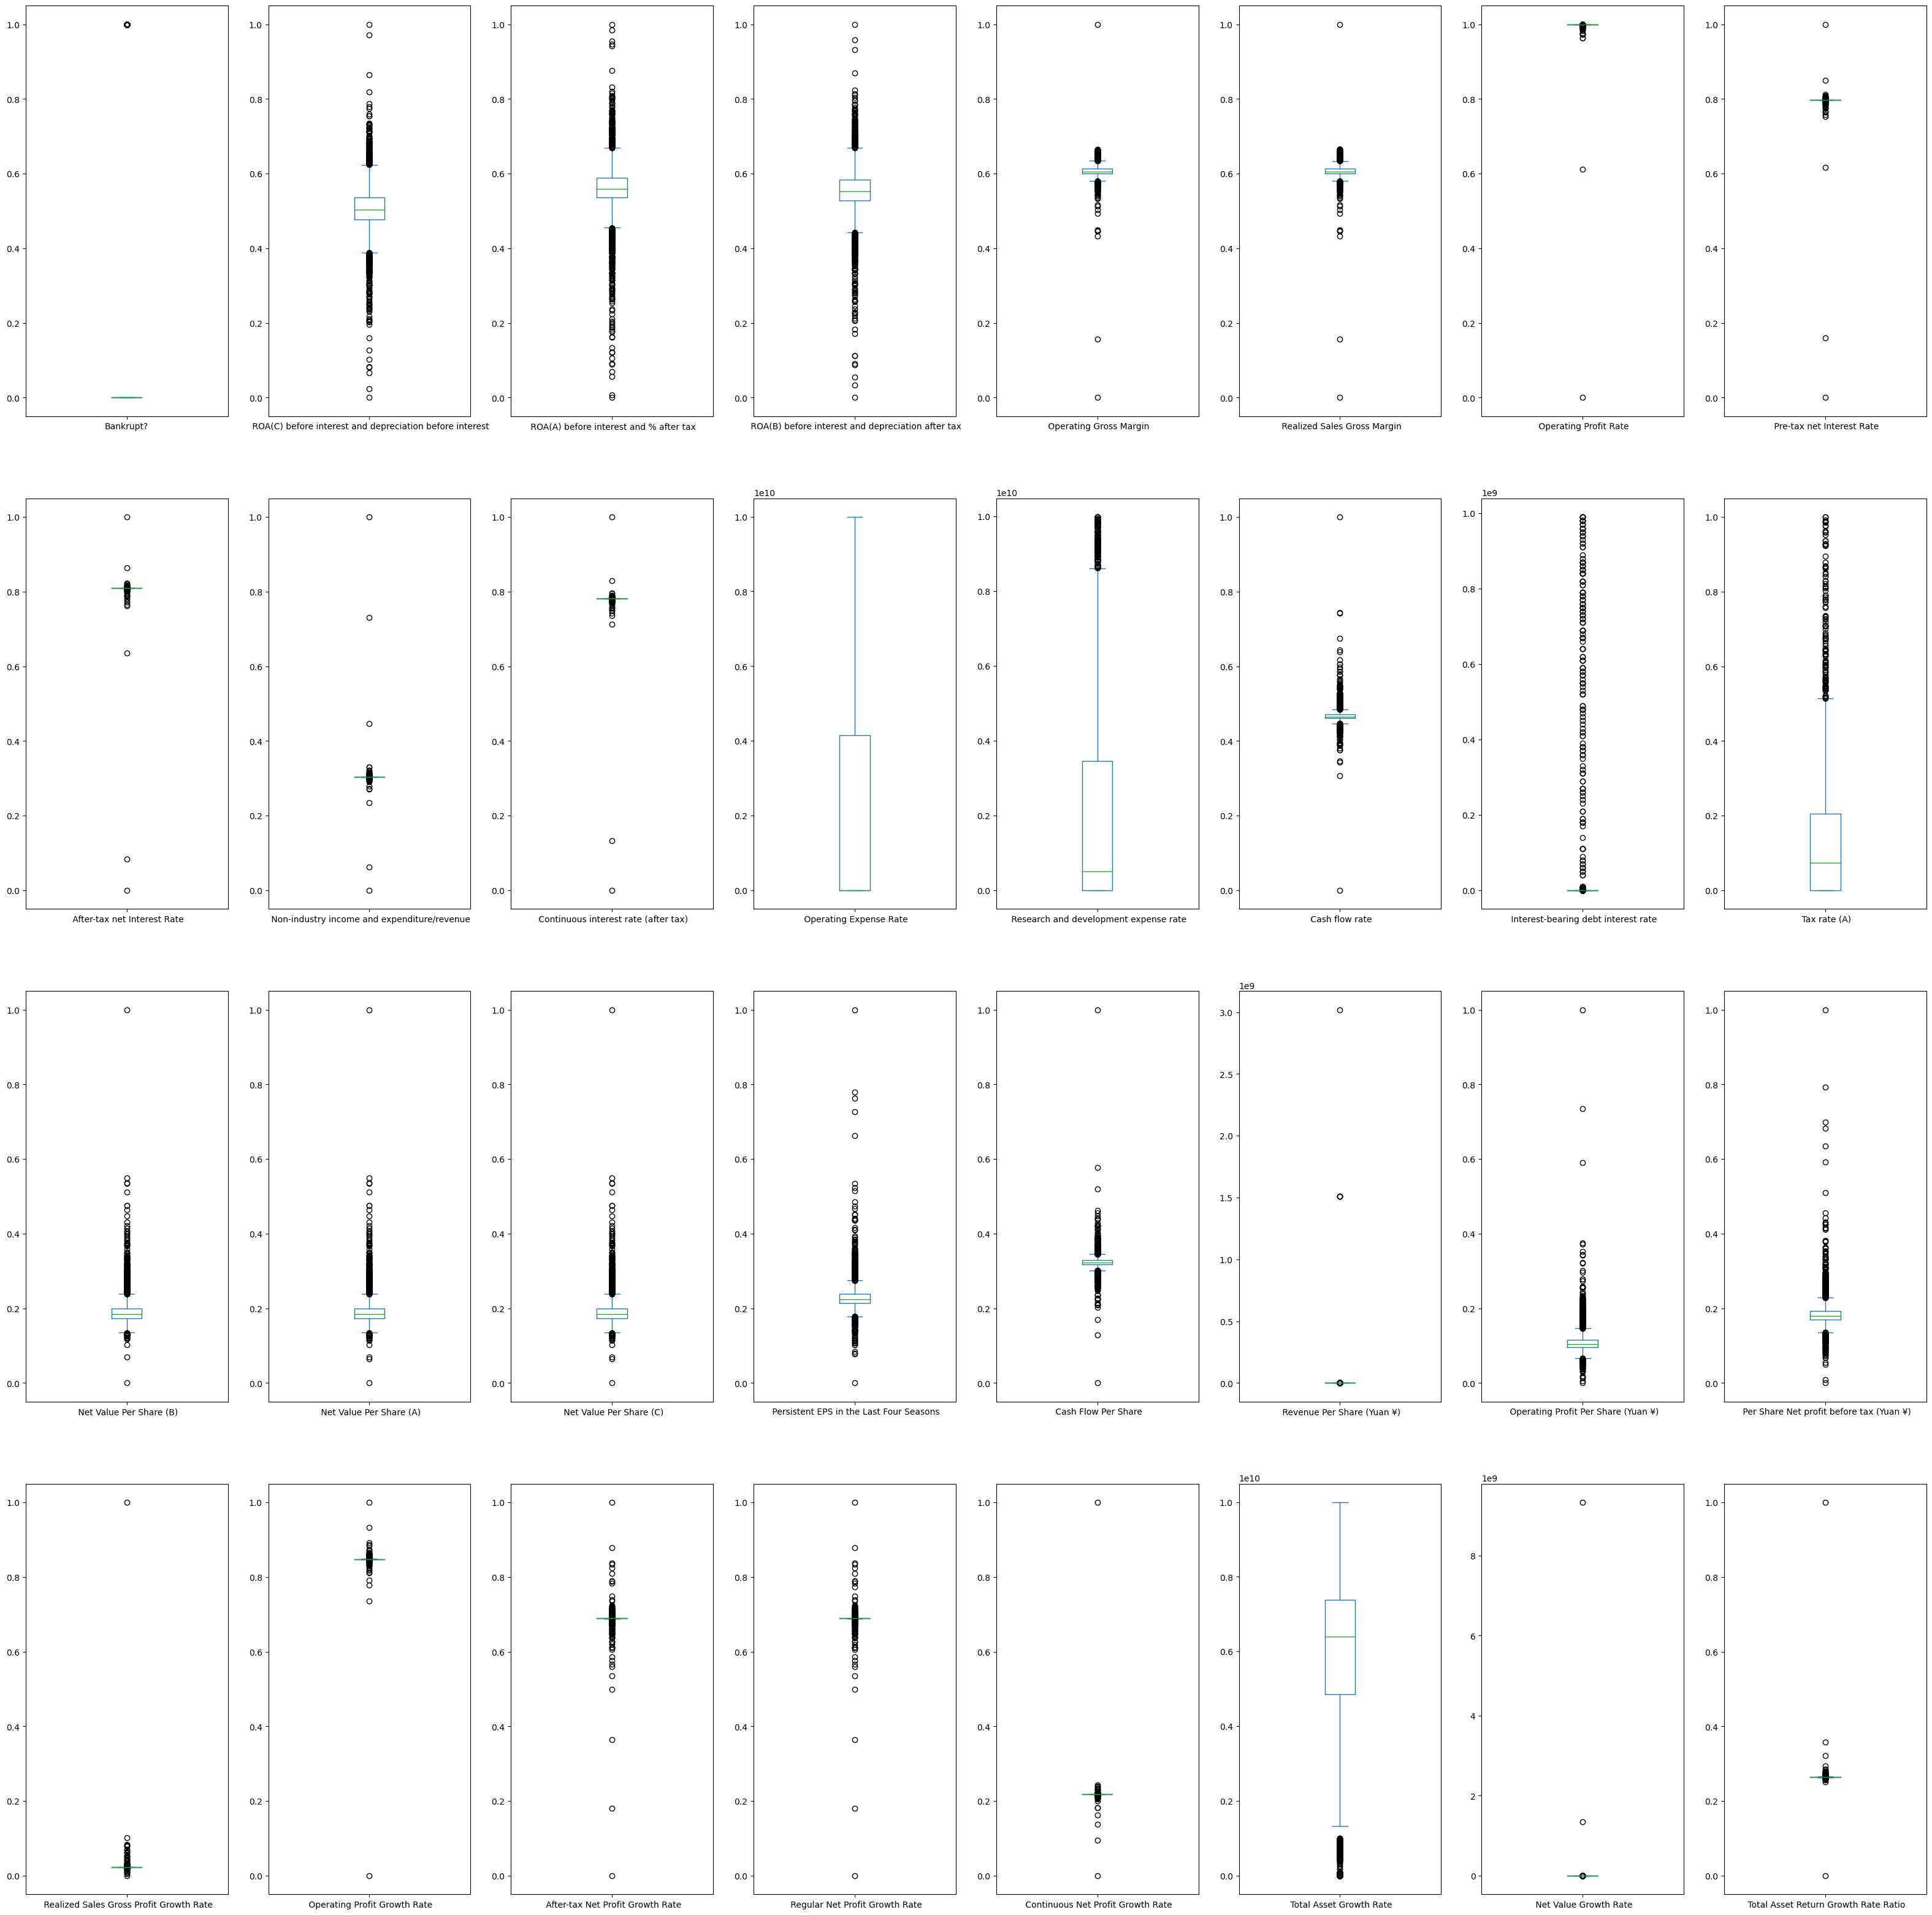

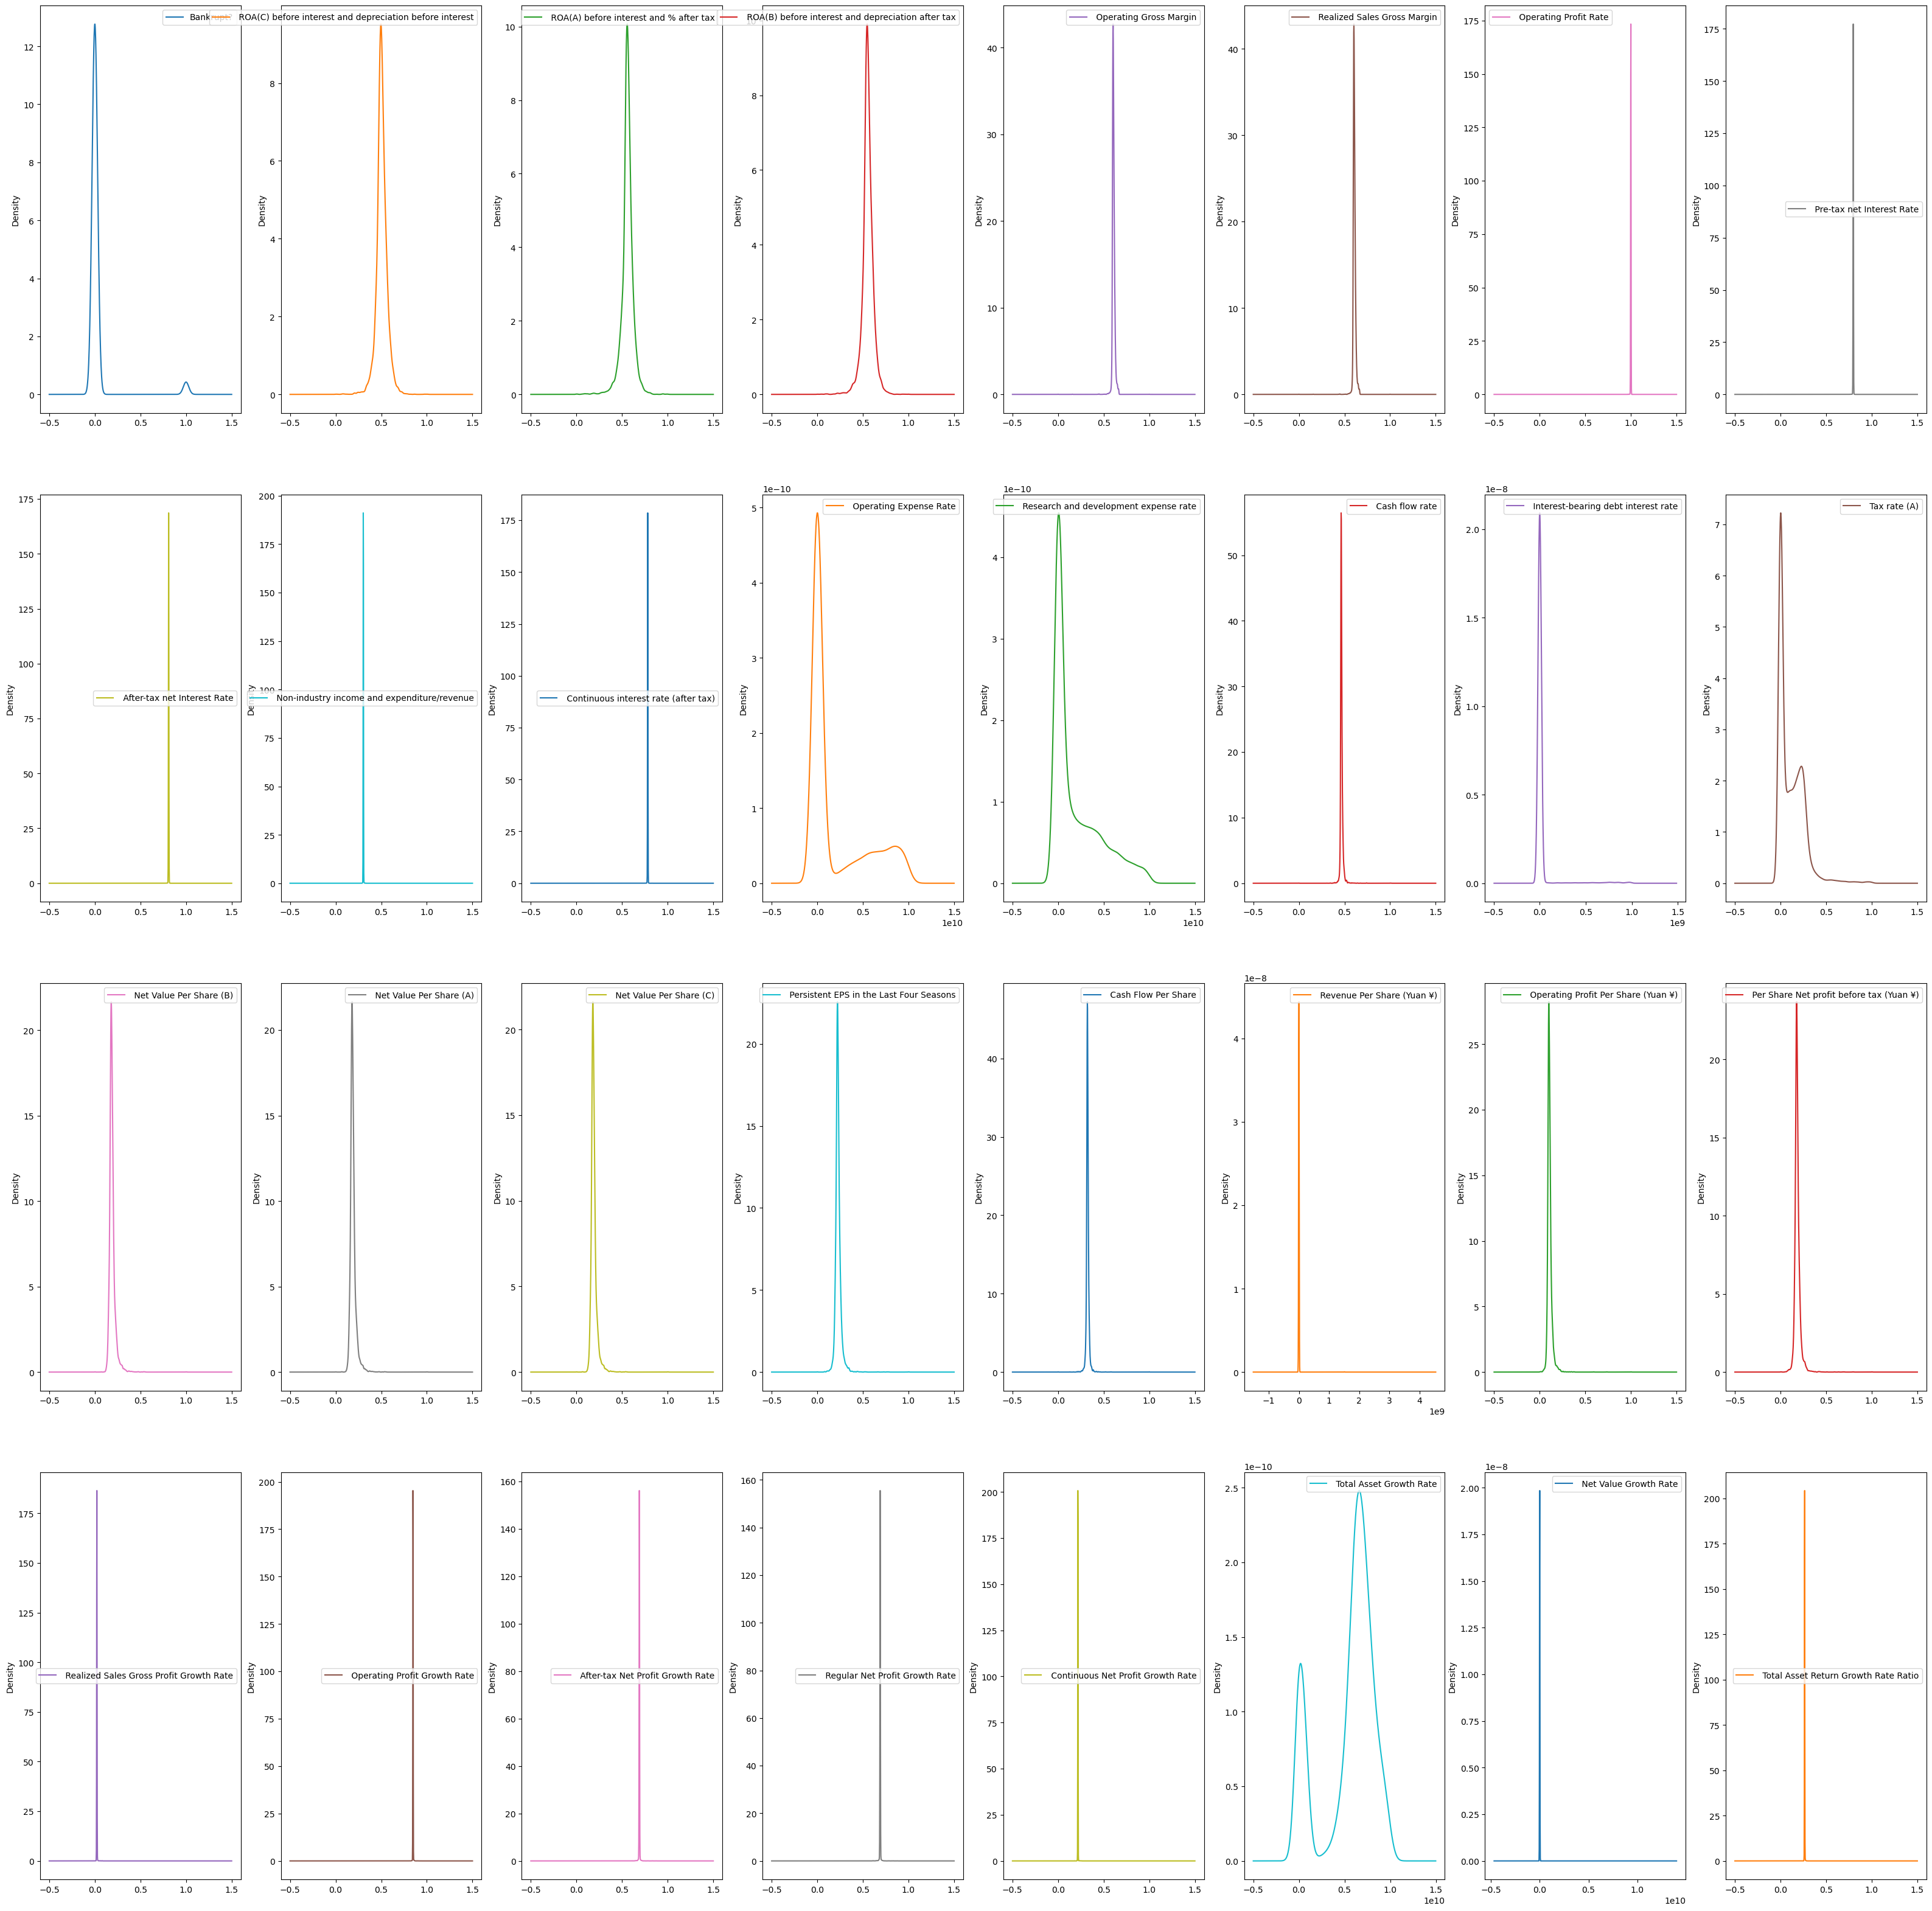

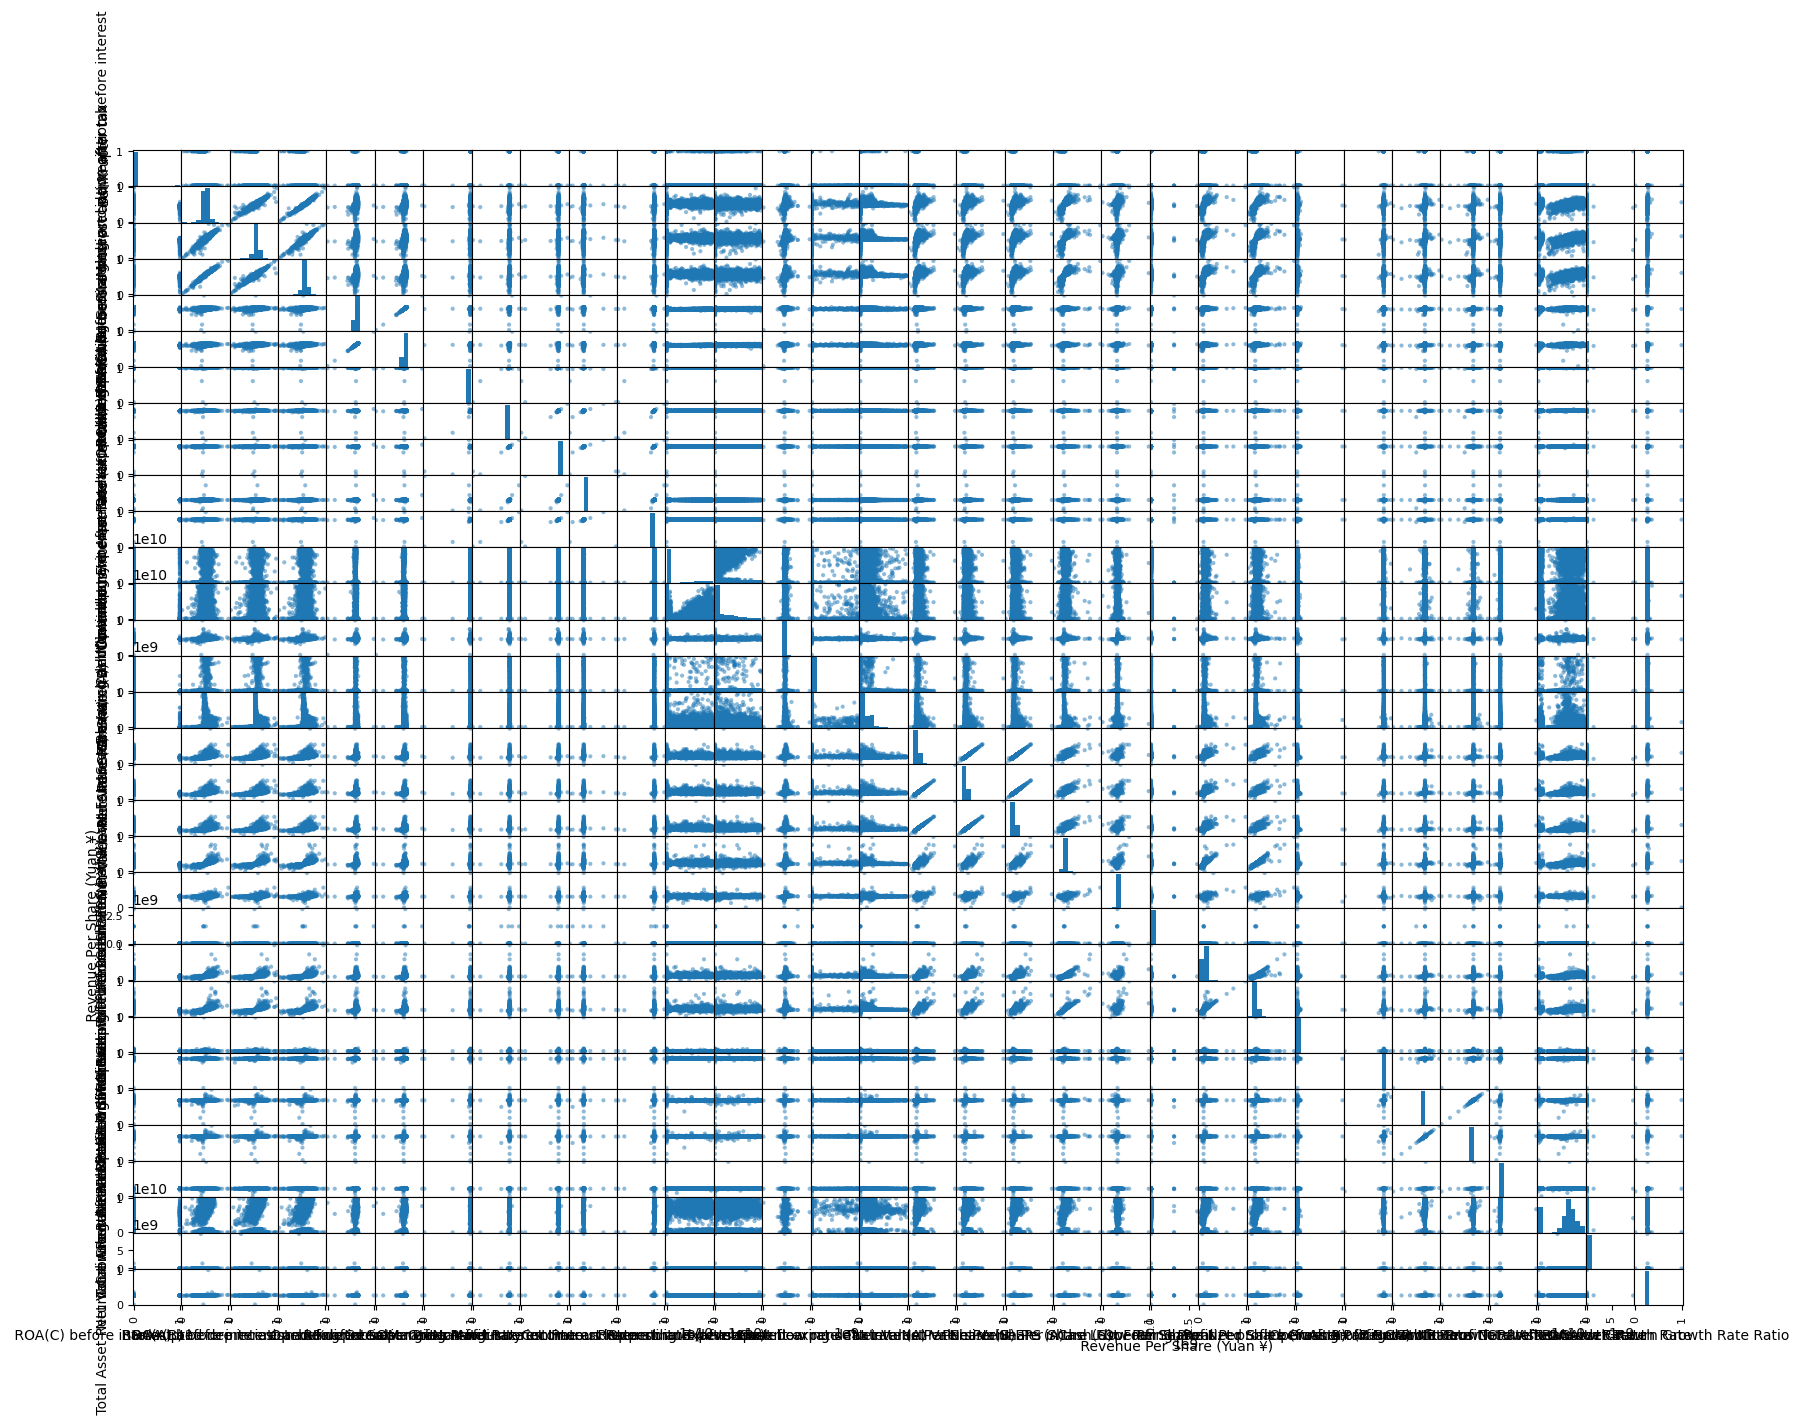

MemoryError: Unable to allocate 207. TiB for an array with shape (28484804637260,) and data type float64

Error in callback <function flush_figures at 0x000001E5E2B96F70> (for post_execute):


KeyboardInterrupt: 

In [39]:
from pandas.plotting import scatter_matrix
def data_visualization(data):
        '''資料視覺化'''
        data.hist(bins=50,figsize=(40,40))
        plt.show()
        data.plot(kind='box',subplots=True,layout=(4,8),sharex=False,sharey=False,figsize=(40,40))
        plt.show()
        data.plot(kind='density',subplots=True,layout=(4,8),sharex=False,sharey=False,figsize=(40,40))
        plt.show()
        #
        scatter_matrix(data,figsize=(40,40))
        plt.show()
        # 圖形化顯示相關係數
        sns.pairplot(data)
        plt.show()
        #sns.heatmap(data.corr(),annot=True)
        #plt.show()
data_visualization(data)

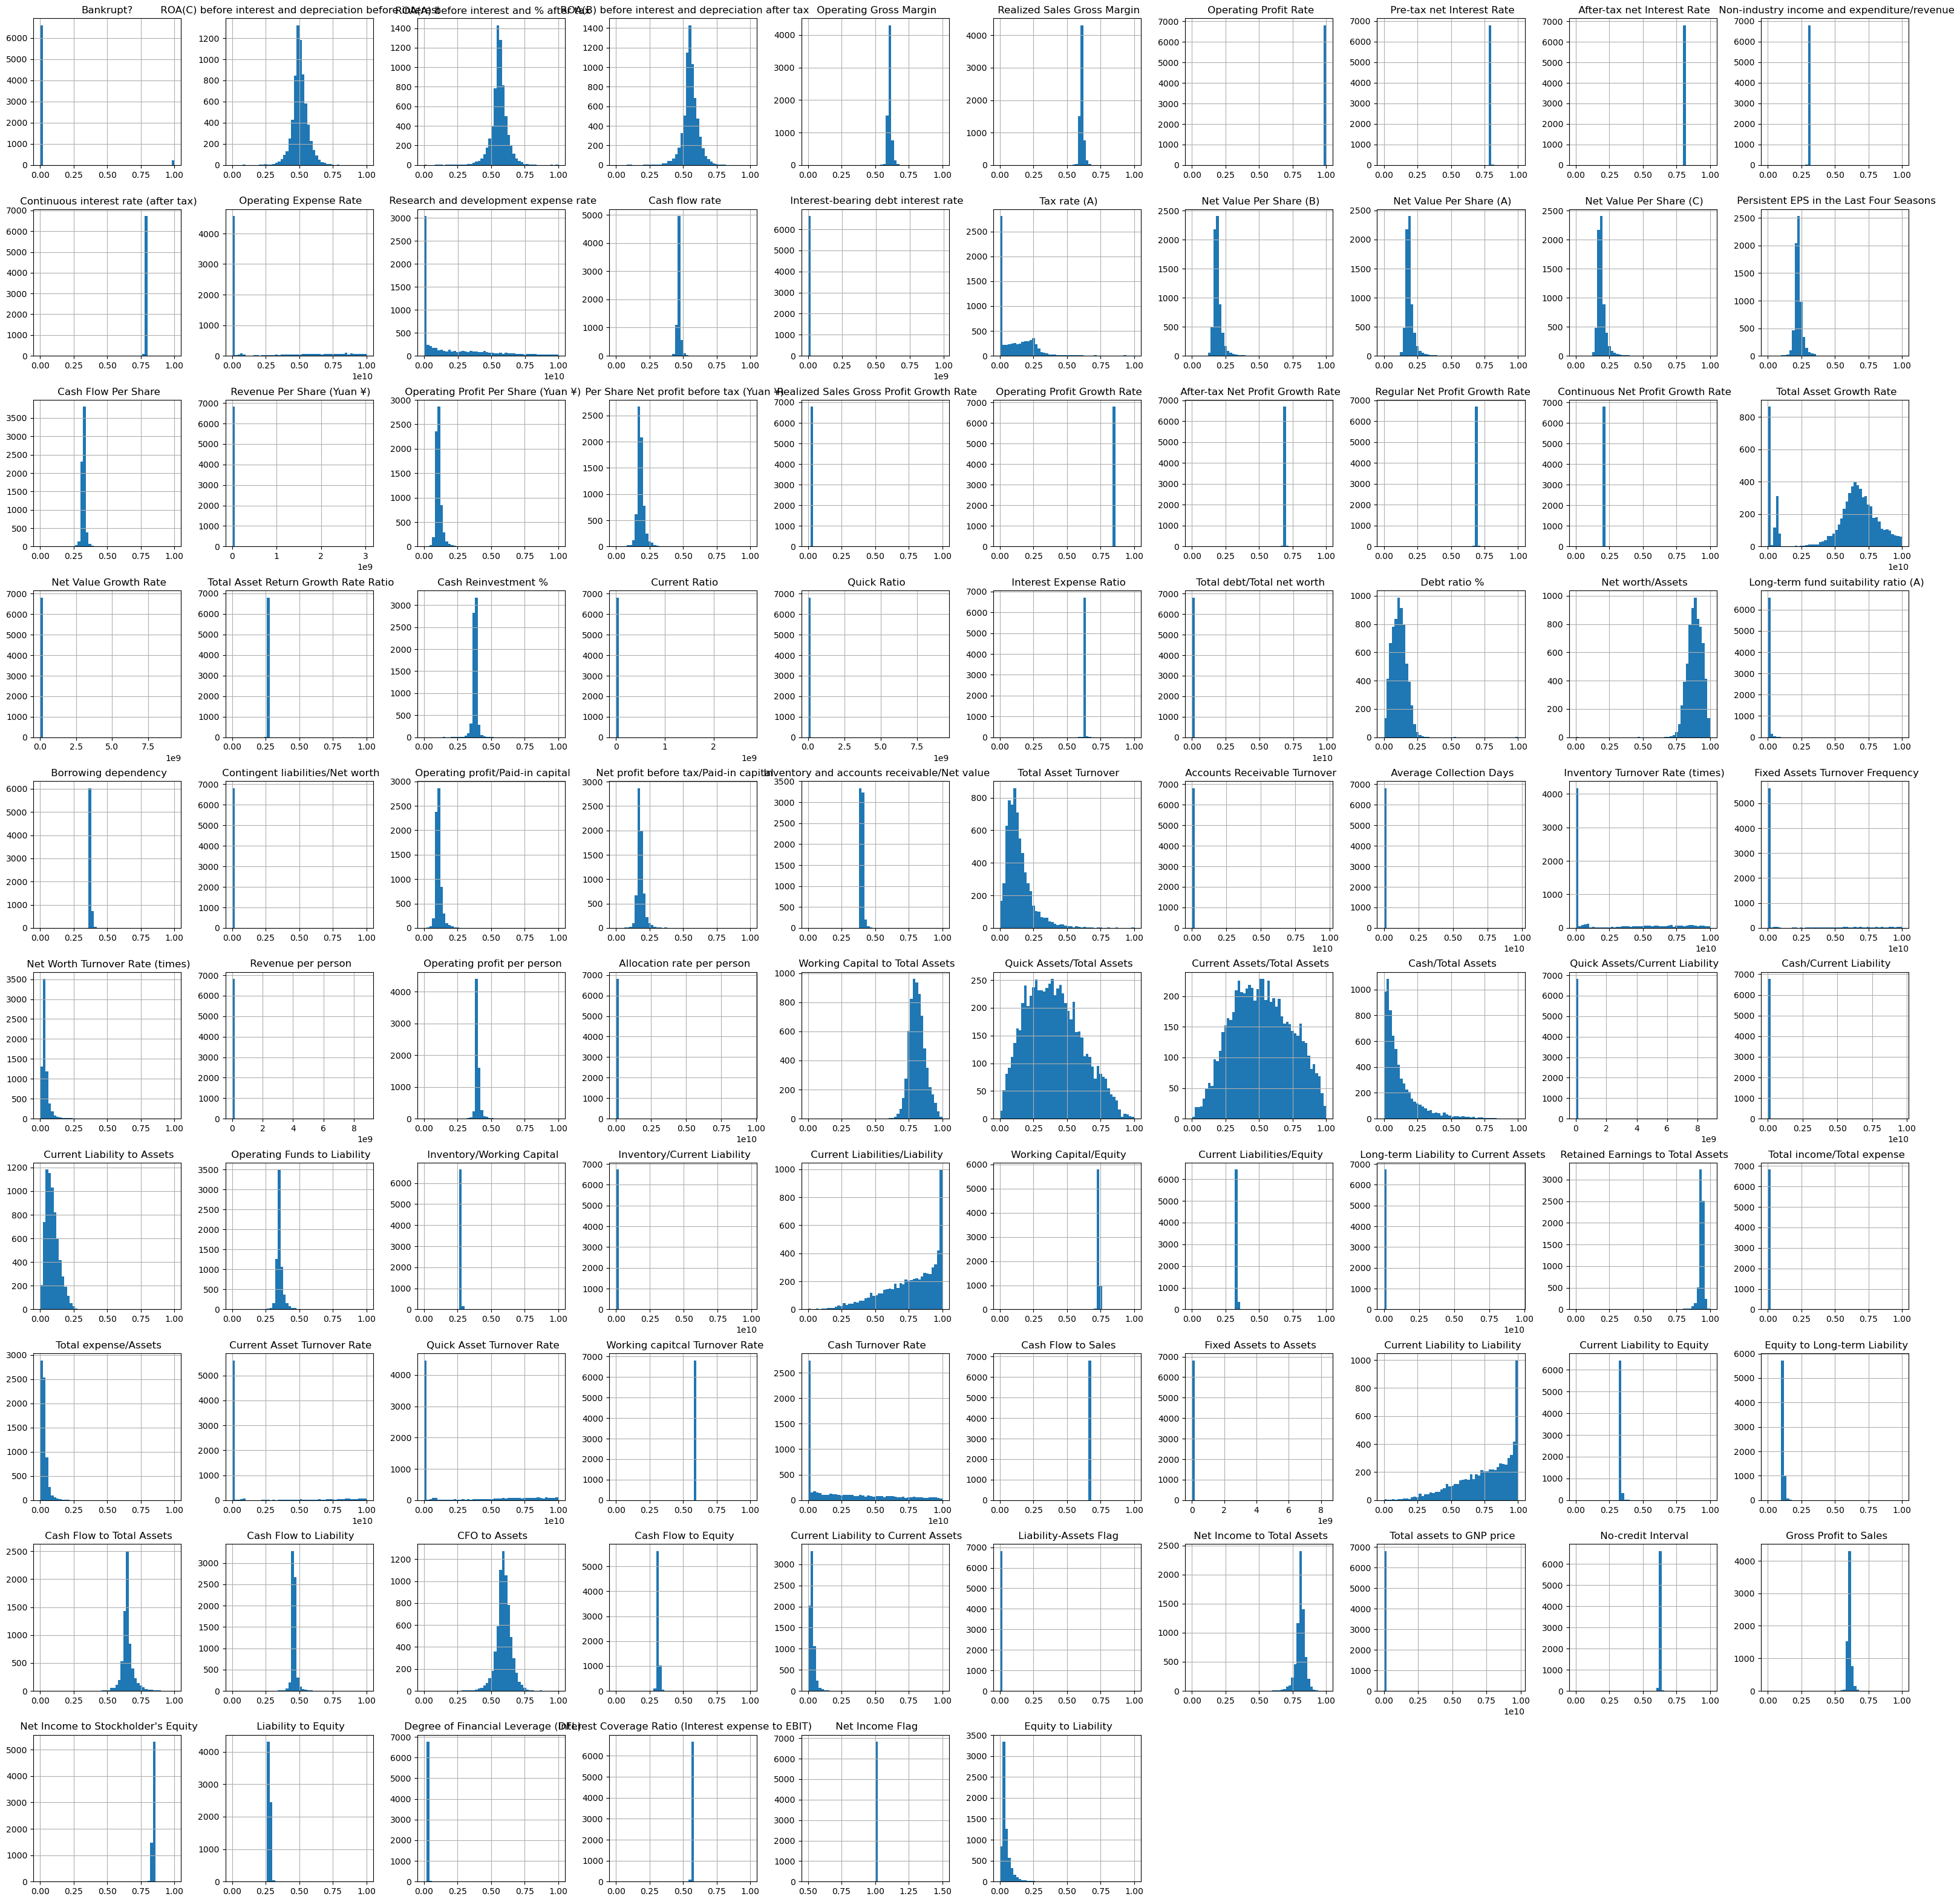

In [42]:
data.hist(bins=50,figsize=(40,40))
plt.show()

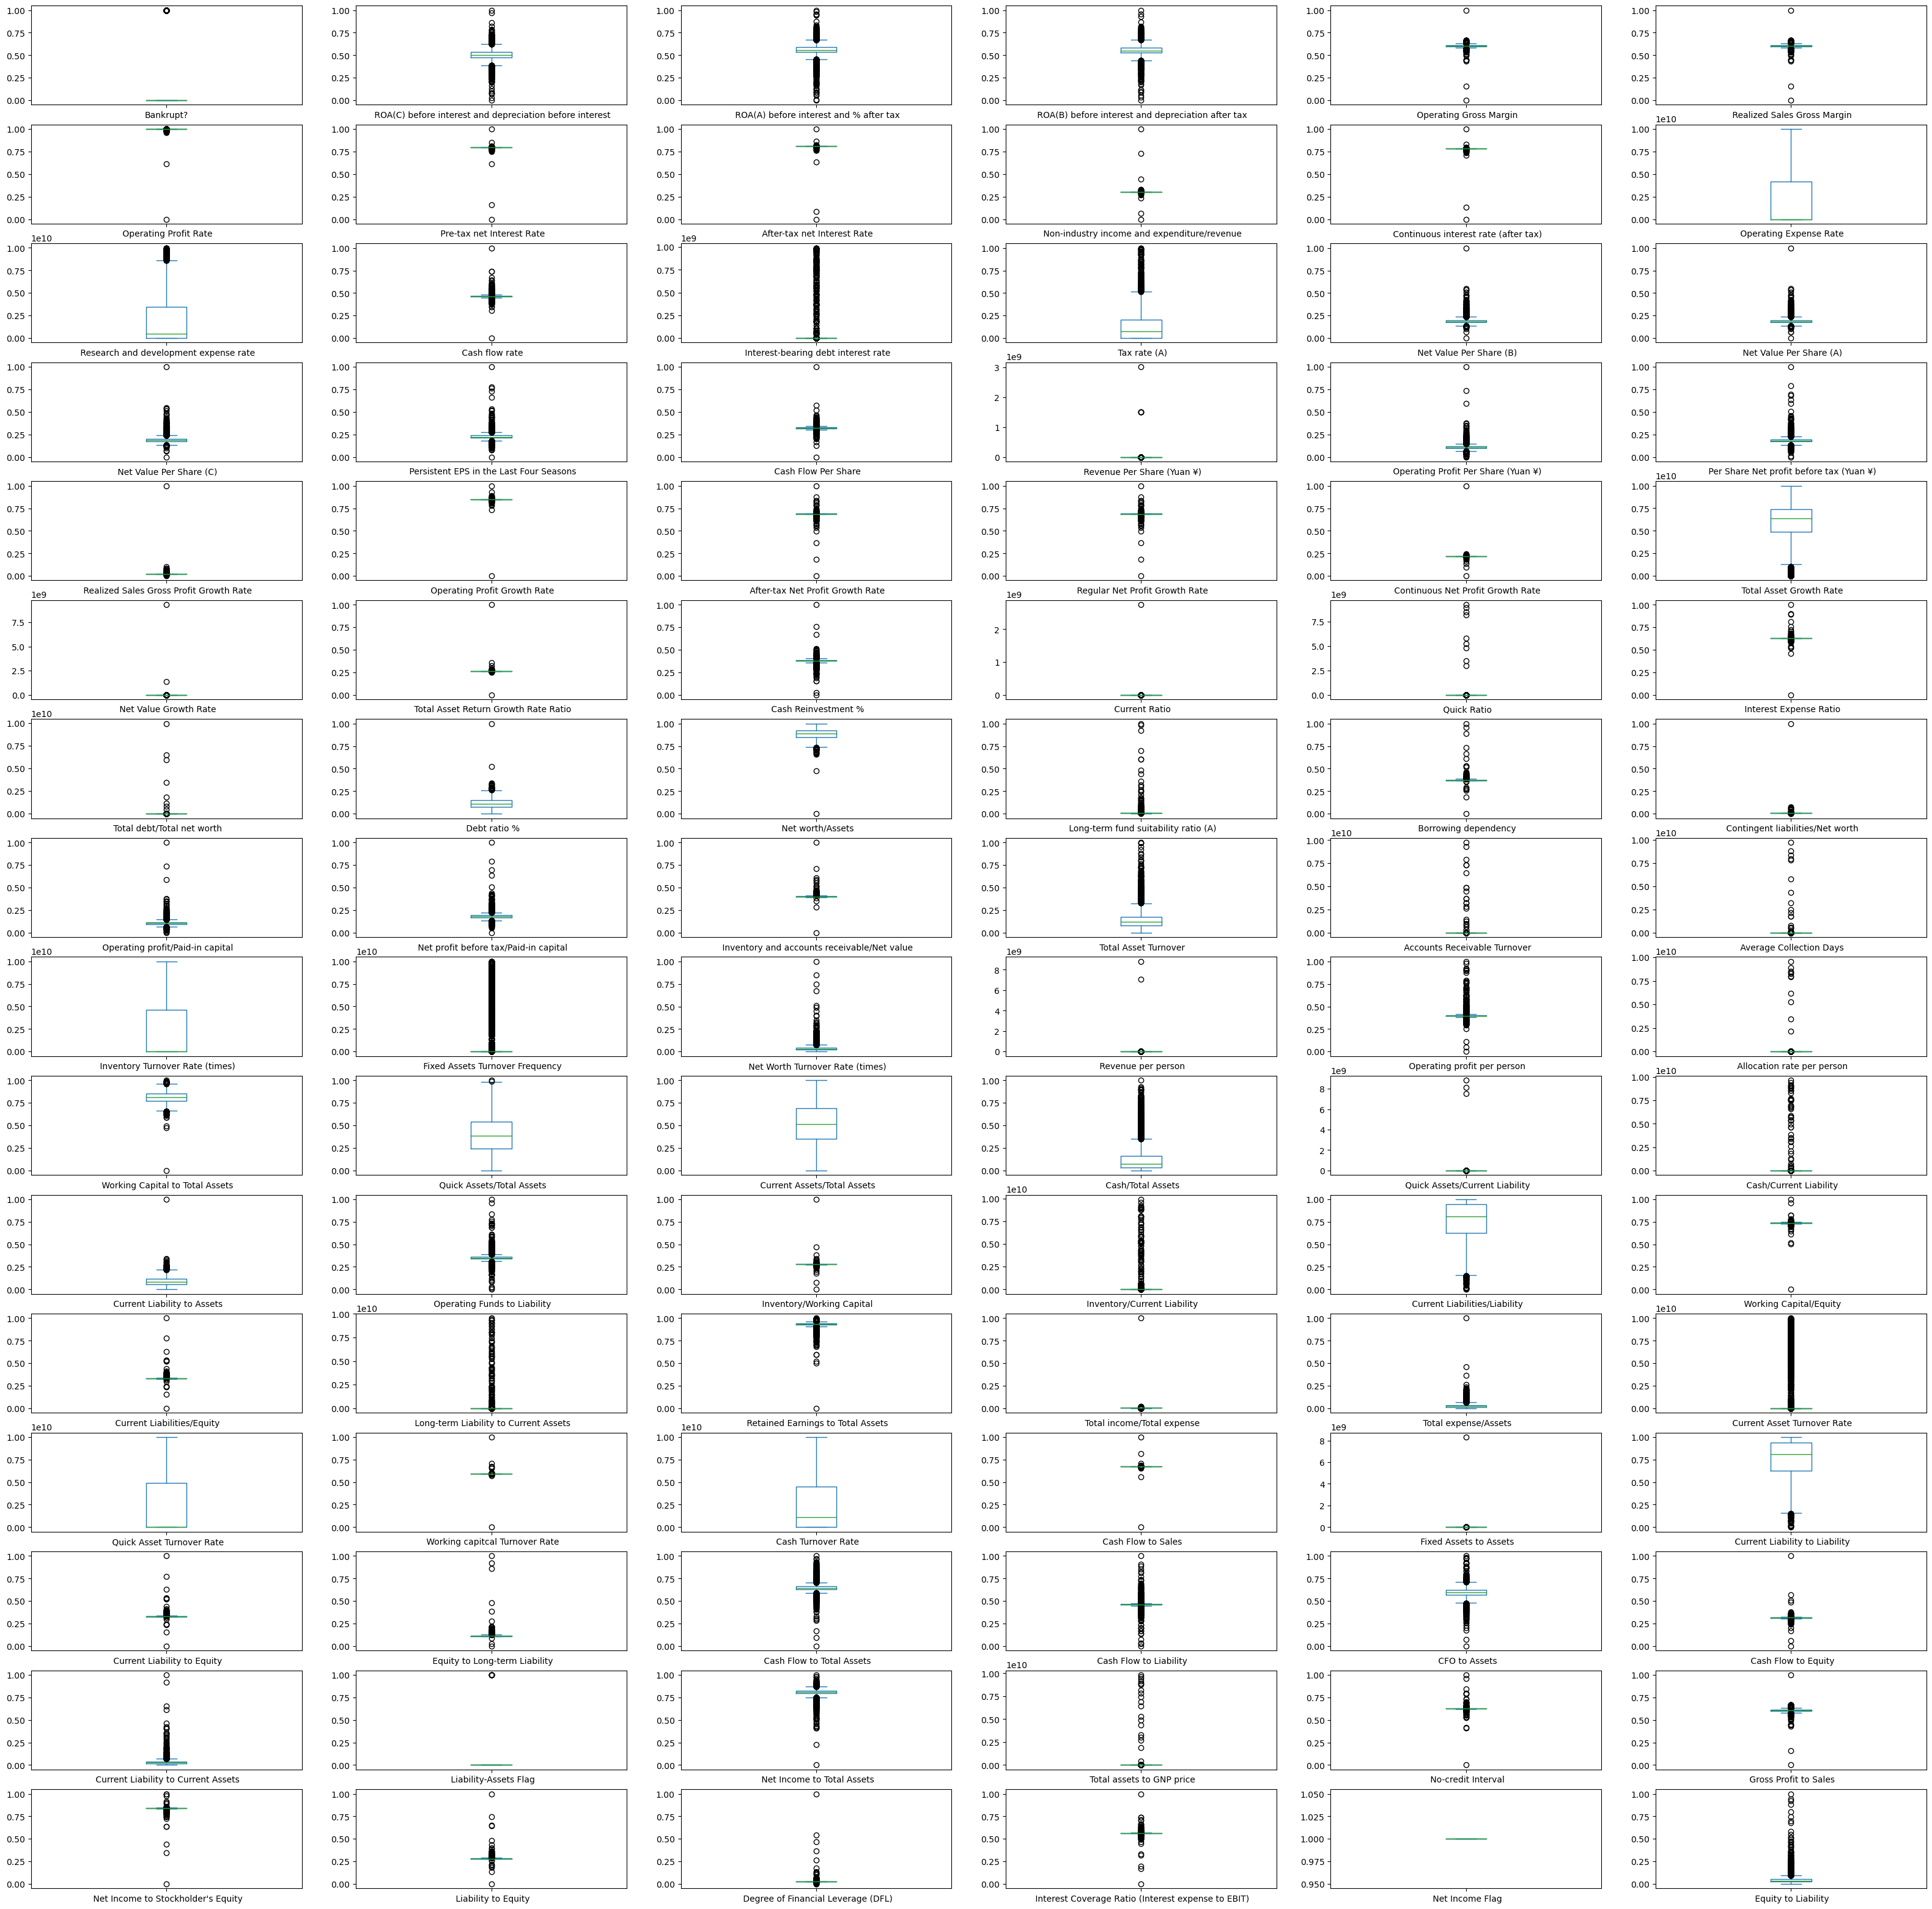

In [44]:
data.plot(kind='box',subplots=True,layout=(16,6),sharex=False,sharey=False,figsize=(40,40))
plt.show()

In [24]:
from pandas_profiling import ProfileReport
report = ProfileReport(data_up, title="brankurpt_data_up")
report.to_file("brankurpt_data_up.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

c:\Users\User\anaconda3\envs\ml\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)
c:\Users\User\anaconda3\envs\ml\lib\site-packages\pandas_profiling\model\pandas\describe_numeric_pandas.py:28: RuntimeWarning: invalid value encountered in subtract
  return np.median(np.abs(arr - np.median(arr)))
c:\Users\User\anaconda3\envs\ml\lib\site-packages\numpy\core\_methods.py:233: RuntimeWarning: invalid value encountered in subtract
  x = asanyarray(arr - arrmean)


IndexError: index 19424 is out of bounds for axis 0 with size 19420